# Seaborn Introduction

In [9]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
%matplotlib inline

In [11]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [12]:
# Themes 
sns.set_theme() # Set default theme for seaborn

### Numerical Plots (Bieu do so ?)
* Distribution (Phan phoi): Histogram, KDE (Kernel Density Estimate (similar to histogram but a line)), Displot
* Bar Plot (Do thi cot)
* Count Plot (Do thi dem)
* Facet Plot: Luoi 2D, gom cac bang hinh thanh boi cac hang va cot
* Box Plot: Bieu hien do thi qua cac 1/4 so lieu
* Join Plot:
* Pair Plot:
* Heat Map: Ky thuat truc quan hoa du lieu cho thay cuong do cua mot hien tuong la mau sac o hai chieu

### Distribution Plot
* Univariate (single feature) distribution of observations

In [13]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


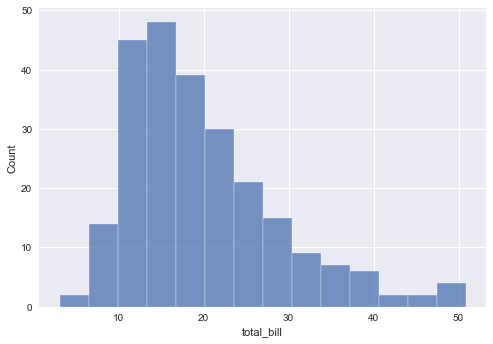

In [14]:
# Plot a histogram on total bill
plt.style.available
plt.style.use("seaborn-whitegrid")
plt.style.use("seaborn") # Set the style
sns.histplot(tips_df["total_bill"]);

In [15]:
tips_df["total_bill"].value_counts().sort_values(ascending = False)

13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

### KDE Plot
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.
* KDE represents the data using a continuous probability density curve in one or more dimensions

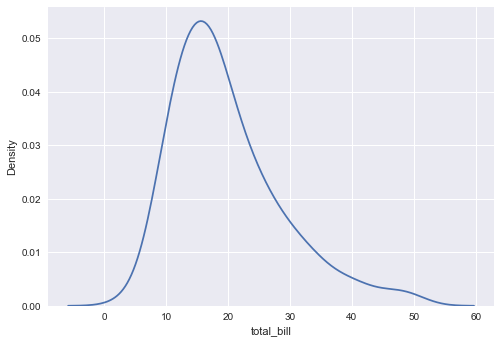

In [16]:
sns.kdeplot(data = tips_df["total_bill"]);

### Displot
* Informative distributional summaries
* Statistical analyses require knowledge about the distribution of variables in your dataset.
* The seaborn function displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation


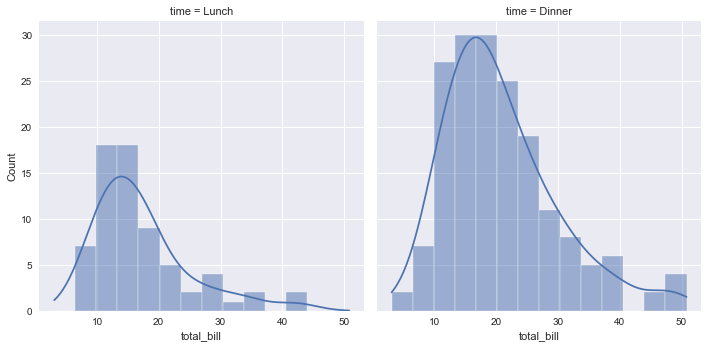

In [17]:
sns.displot(data = tips_df, x = "total_bill", col = "time", kde = True);

## Categorical Plots

### Bar Plots

In [18]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


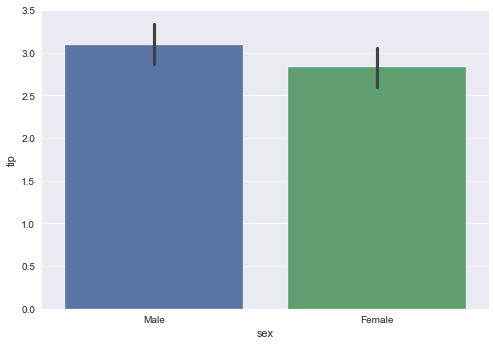

In [19]:
sns.barplot(data = tips_df, x = "sex", y = "tip", estimator = np.mean);

### Count Plot

In [20]:
tips_df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

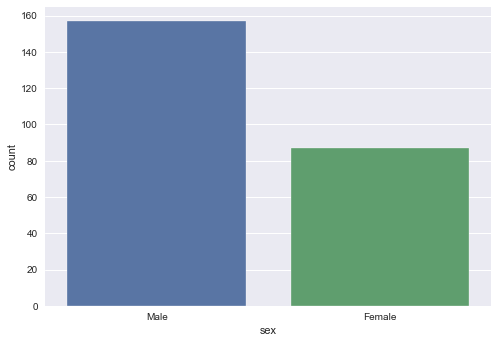

In [21]:
sns.countplot(data = tips_df, x = "sex");

### Box Plot
Box Plot is a good indication of how the values in the data are spread out ("minium", first quartile (Q1), median, third quartile (Q3), and “maximum”)
* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped

Resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

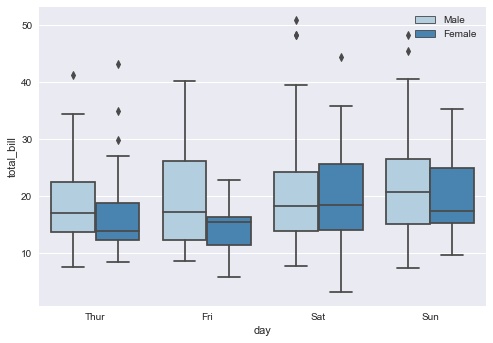

In [22]:
sns.boxplot(data = tips_df, x = "day", y = "total_bill", hue = "sex", palette = "Blues");
plt.legend(loc = 0);

### Facet Grid
* FacetGrid can be drawn with up to three dimensions: row, col, and hue.
* The main approach for visualizing data on this grid is with the FacetGrid.map() method.

In [23]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


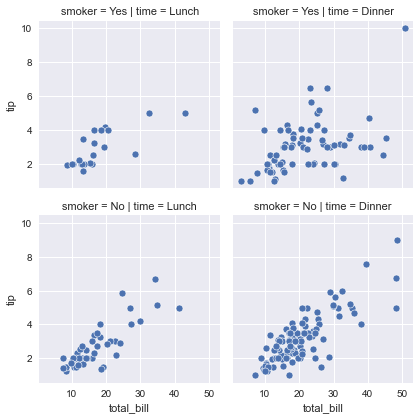

In [24]:
tips_fg = sns.FacetGrid(data = tips_df, row = "smoker", col = "time") # Create a Class Instance of Facet Grid class
tips_fg.map(sns.scatterplot, "total_bill", "tip");

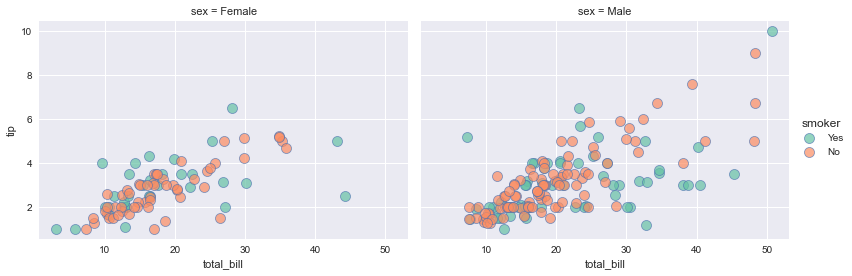

In [38]:
kws = dict(s = 100, edgecolor = "b", alpha = 0.7)
new_fg = sns.FacetGrid(data = tips_df, col = "sex"
                       , hue = "smoker", col_order = ["Female", "Male"]
                       , palette = "Set2"
                       , height = 4, aspect = 1.4)
new_fg.map(sns.scatterplot, "total_bill", "tip", **kws)
new_fg.add_legend();

### Joint Plot
* `joint` distribution between two variables along with each variable's marginal distribution

In [39]:
penguin_df = sns.load_dataset('penguins')

In [40]:
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


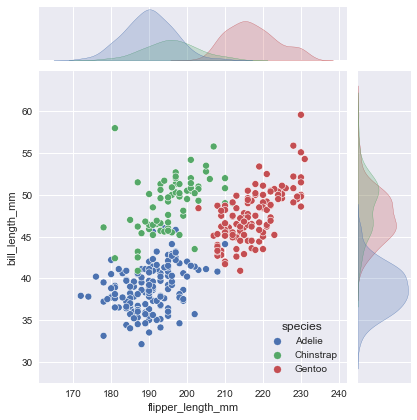

In [48]:
sns.jointplot(data = penguin_df, x = "flipper_length_mm", y = "bill_length_mm", hue = "species");

### Pair Plot (Requires Numerical Data)

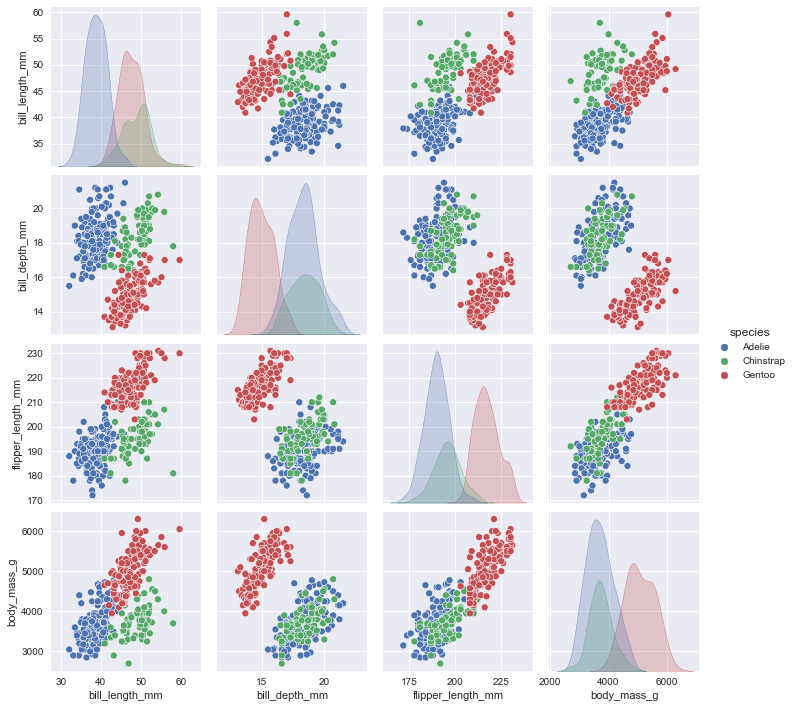

In [50]:
sns.pairplot(data = penguin_df, hue = "species");

### Heatmaps
Describe density or intensity of variables, visualize patterns, variance and even anomalies

In [51]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [54]:
flights = pd.pivot_table(data = flights_df, index = "month", columns = "year", values = "passengers");
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


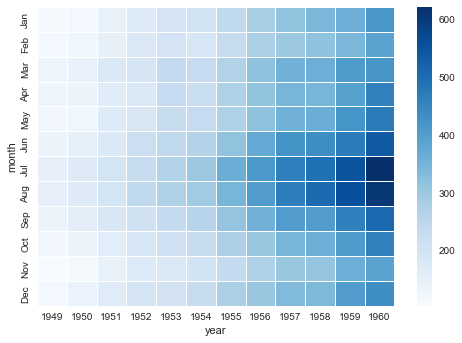

In [58]:
sns.heatmap(data = flights, cmap = "Blues", linecolor = "white", linewidth = 1);